In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import csv

In [2]:
dataset = pd.read_csv("sdcReduced3.csv")

In [3]:
dataset

,Temp.,Smoke,CO conc.,CO2 conc.,O2 conc.,Fire Label
0,25.80,0.299,0.074,1.030,21.000,0
1,25.80,0.296,0.078,1.030,21.000,0
2,25.90,0.299,0.077,1.030,21.000,0
3,25.80,0.296,0.073,1.030,20.900,0
4,25.90,0.302,0.077,1.030,21.000,0
...,...,...,...,...,...,...
5445,28.64,1.688,0.167,14.598,8.185,1
5446,28.33,1.688,0.160,14.383,8.185,1
5447,29.19,1.688,0.150,14.144,8.271,1
5448,29.32,1.688,0.157,13.978,8.279,1


In [4]:
# input
x = dataset.iloc[:, [0, 1, 2, 3, 4]].values

# output
y = dataset.iloc[:, 5].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=0
)

In [6]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [7]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9492354740061162
F1 Score: 0.9492573239221179


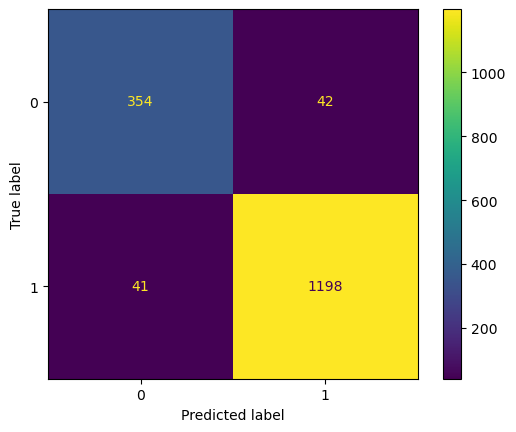

In [8]:
labels = ["0", "1"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [9]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print (X_train[0:10, :])

[[-0.26933394 -0.43136758 -0.64548653  1.47983936 -2.84230765]
 [ 0.85734325  1.39292819 -0.23712197  3.16026994 -2.95589373]
 [-0.2520913  -0.12933855  0.67241728 -0.24537636  0.36204355]
 [-0.251564   -0.13236894  0.80235146 -0.24537636  0.36204355]
 [-0.27471238 -0.43136758 -0.64548653 -0.25558474  0.37055585]
 [ 0.26940621 -0.31823296 -0.64548653 -0.25163311  0.33491057]
 [-0.14504985 -0.07883202  1.2664021  -0.24208333  0.3886445 ]
 [-0.22414452  0.17774114  1.73045274 -0.23220426  0.36204355]
 [-0.21518046 -0.04145719  1.17359197 -0.24208333  0.36204355]
 [-0.22150803  0.15046762  1.63764261 -0.23220426  0.36204355]]


In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 294  102]
 [  34 1205]]


In [13]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9168195718654434


In [14]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# importing machine learning models for prediction
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# importing voting classifier
from sklearn.ensemble import VotingClassifier

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=0
)

In [16]:
model1 = GaussianNB()
model2 = LogisticRegression()

In [17]:
ensemblemodel = VotingClassifier(
	estimators=[('nb', model1), ('lr', model2)], voting='hard')
ensemblemodel.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('lr', LogisticRegression())])

In [18]:
pred_model= ensemblemodel.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_model)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 354   42]
 [  52 1187]]


In [20]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(y_test, pred_model))

Accuracy :  0.9425076452599388


In [21]:
model_1 = GaussianNB()
model_2 = LogisticRegression()
model_3 = RandomForestClassifier()
model_4 = DecisionTreeClassifier()
model_5 = KNeighborsClassifier(n_neighbors=2)

In [22]:
final_model = VotingClassifier(
	estimators=[('nb', model_1), ('lr', model_2), ('rf', model_3), ('dt', model_4), ('knn', model_5)], voting='hard')
final_model.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()), ('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=2))])

In [23]:
pred_final = final_model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, pred_final)
print ("Confusion Matrix : \n", cm1)

Confusion Matrix : 
 [[ 392    4]
 [  12 1227]]


In [25]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(y_test, pred_final))

Accuracy :  0.9902140672782874


In [26]:
print(log_loss(y_test, pred_final))

0.3527207671106268
